## Loan Project

### Bu projede, bir finansal kuruluşa kredi geri ödeme konusunda potansiyel risk taşıyan müşterileri tespit etmek amacıyla bir tahmin modeli geliştirdik. Projenin temel amacı, kredi başvurusu yapan müşterilerin ödeme performanslarını önceden tahmin ederek, kuruluşun risk yönetimini iyileştirmek ve finansal kayıpları minimize etmekti.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('LoansTrainingSet.csv')

C:\Users\mucahit\AppData\Local\Temp\ipykernel_15344\3228652955.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('LoansTrainingSet.csv')


In [3]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [5]:
df.shape

(256984, 19)

In [6]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [7]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [8]:
df.corr(numeric_only=True)

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.139743,0.024069,0.014725,0.003488,-0.003094,-0.000062,0.003138,0.003576,-0.003069
Credit Score,-0.139743,1.000000,-0.033221,-0.011658,-0.007994,0.008124,0.000777,-0.003263,-0.003426,0.004381
Annual Income,0.024069,-0.033221,1.000000,0.146859,-0.059675,0.140463,-0.013672,0.292165,-0.044837,0.038185
Years of Credit History,0.014725,-0.011658,0.146859,1.000000,-0.039695,0.128033,0.061251,0.201001,0.062049,0.020915
Months since last delinquent,0.003488,-0.007994,-0.059675,-0.039695,1.000000,-0.035803,0.088612,-0.024292,0.112907,0.002730
Number of Open Accounts,-0.003094,0.008124,0.140463,0.128033,-0.035803,1.000000,-0.013731,0.222763,-0.022805,0.005754
Number of Credit Problems,-0.000062,0.000777,-0.013672,0.061251,0.088612,-0.013731,1.000000,-0.103814,0.755866,0.584917
Current Credit Balance,0.003138,-0.003263,0.292165,0.201001,-0.024292,0.222763,-0.103814,1.000000,-0.117995,-0.011118
Bankruptcies,0.003576,-0.003426,-0.044837,0.062049,0.112907,-0.022805,0.755866,-0.117995,1.000000,0.046160
Tax Liens,-0.003069,0.004381,0.038185,0.020915,0.002730,0.005754,0.584917,-0.011118,0.046160,1.000000


### Kategorik değerleri sayısal değerlere dönüştürme:

In [9]:
df['Loan Status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [10]:
# 'Fully Paid' olanları 1'e, 'Charged Off' olanları ise 0'a dönüştürüyoruz.
df['Loan Status'] = df['Loan Status'].map({'Fully Paid': 1, 'Charged Off': 0})

In [11]:
#  'Fully Paid' durumu için 1 değerini seçtik, çünkü bu durum genellikle kredi borcunun tamamen ödendiği başarılı bir durumu temsil eder.
# 'Charged Off' durumu için ise 0 değerini seçtik, çünkü bu durum genellikle kredi borcunun ödenemediği veya kredinin kötüye kullanıldığı başarısız bir durumu temsil eder.

In [12]:
df['Term'].unique() 

array(['Short Term', 'Long Term'], dtype=object)

In [13]:
# 'Short Term' olanları 1'e, 'Long Term' olanları ise 0'a dönüştürüyoruz.
df['Term'] = df['Term'].map({'Short Term': 1, 'Long Term': 0})

In [14]:
df['Years in current job'].unique() 

array(['10+ years', '4 years', '6 years', '5 years', nan, '3 years',
       '2 years', '< 1 year', '1 year', '7 years', '9 years', '8 years'],
      dtype=object)

In [15]:
import matplotlib.pyplot as plt

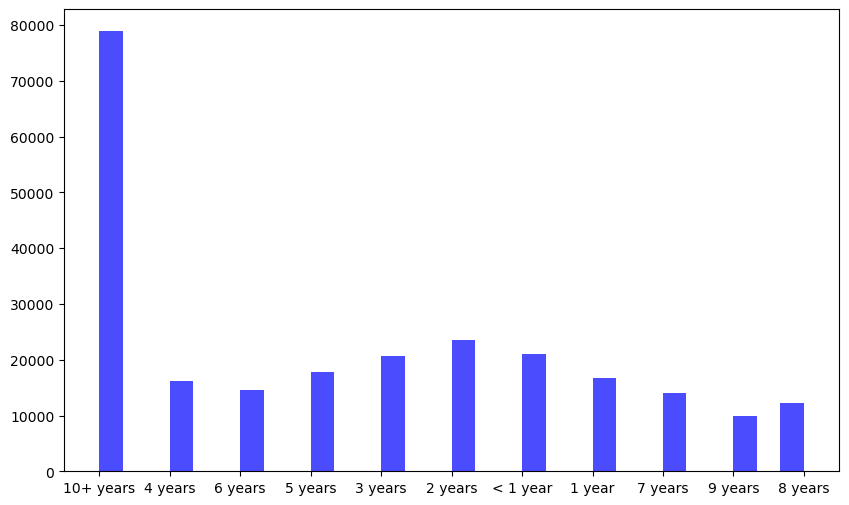

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df['Years in current job'].dropna(), bins=30, alpha=0.7, color='blue')
plt.show()

In [17]:
# Grafiğe baktığımız zaman en çok tekrar eden(mod) değeri ile boş değerleri doldurmanın çok mantıklı olduğu gözüküyor.

In [18]:
df['Years in current job'] = df['Years in current job'].replace({'years': '', '< 1 year': '0'}, regex=True)
df['Years in current job'] = df['Years in current job'].replace({'\+': '','year' : '' }, regex=True)
# +, < ve years kategorik değerleri kaldırdık.

In [19]:
mode_value = df['Years in current job'].mode().iloc[0] 
# En sık rastlanan değeri bul

In [20]:
df['Years in current job'].fillna(mode_value, inplace=True) # Eksik değerleri mod ile doldur

In [21]:
df['Years in current job'].unique() #işlemleri gerçekleştirebildik mi diye kontrol ediyoruz.

array(['10 ', '4 ', '6 ', '5 ', '3 ', '2 ', '0', '1 ', '7 ', '9 ', '8 '],
      dtype=object)

In [22]:
df['Home Ownership'].unique()
# burada one-hot codding uygulayacağım. Çünkü, belirli bir demografik veya ekonomik çevrede, kendi evine sahip olmak,
#kiralık bir eve göre daha az finansal istikrar gösterebilir (örneğin, yüksek borç yükü nedeniyle).

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

In [23]:
df = pd.get_dummies(df, columns=['Home Ownership'],  dtype = int)

In [24]:
df['Monthly Debt'] = df['Monthly Debt'].replace({'\$' :  ' ', ',': ''}, regex = True)
# kategorik ifadeden kurtarıp nümerik ifadeye dönüştürdük.

In [25]:
df['Purpose'].unique()

array(['Debt Consolidation', 'other', 'Business Loan',
       'Home Improvements', 'Buy House', 'Other', 'Buy a Car',
       'Medical Bills', 'Take a Trip', 'Educational Expenses'],
      dtype=object)

In [26]:
#Purpose kategorisini tamamen bağımsız özellikler olarak değerlendirmek istiyorum. Bundan dolayı yine one-hot codding yöntemini kullanacağım.

In [27]:
df = pd.get_dummies(df, columns = ['Purpose'],  dtype = int)

In [28]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_other
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,1,741.0,10,33694.0,584.03,12.3,41.0,10,0,6760,16056,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,1,3441,1,734.0,4,42269.0,1106.04,26.3,NaN,17,0,6262,19149,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,1,21029,1,747.0,10,90126.0,1321.85,28.8,NaN,5,0,20967,28335,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,18743,1,747.0,10,38072.0,751.92,26.2,NaN,9,0,22529,43915,0.0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,1,11731,1,746.0,4,50025.0,355.18,11.5,NaN,12,0,17391,37081,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [29]:
#İstediğimiz tüm değerleri kategorik değerden nümerik değerlere dönüştürdük.

### Kalan boş değerleri doldurma

In [30]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job                 0
Annual Income                    61676
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
Home Ownership_HaveMortgage          0
Home Ownership_Home Mortgage         0
Home Ownership_Own Home              0
Home Ownership_Rent                  0
Purpose_Business Loan                0
Purpose_Buy House                    0
Purpose_Buy a Car                    0
Purpose_Debt Consolidation           0
Purpose_Educational Expen

In [31]:
df['Tax Liens'].nunique()

12

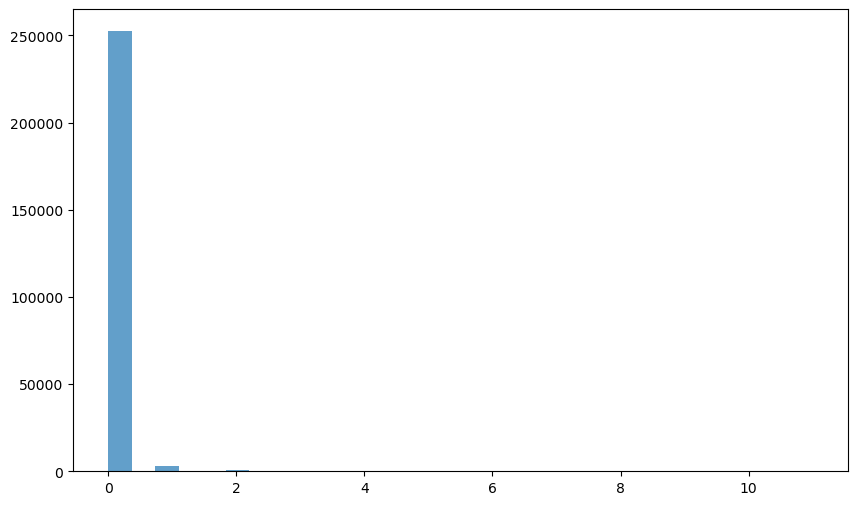

In [32]:
plt.figure(figsize = (10,6))
plt.hist(df['Tax Liens'],bins=30, alpha=0.7)
plt.show()

In [33]:
#zaten 23 değer var, çok fark etmez ama mod ile doldurmak daha mantıklı olacaktır.

In [34]:
mode_value = df['Tax Liens'].mode().iloc[0] 

In [35]:
df['Tax Liens'].fillna(mode_value, inplace=True)

In [36]:
df['Bankruptcies'].unique()

array([ 0.,  1.,  2., nan,  3.,  4.,  5.,  7.,  6.])

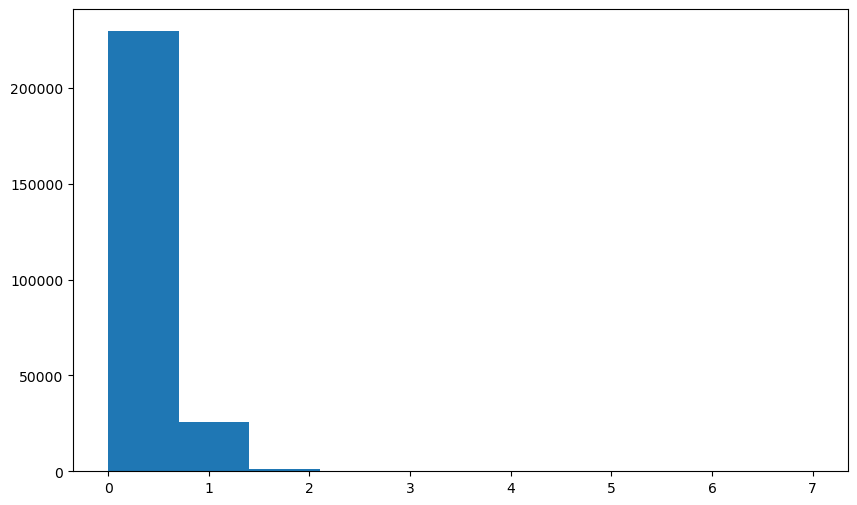

In [37]:
plt.figure(figsize= (10,6))
plt.hist(df['Bankruptcies'])
plt.show()

In [38]:
#yine mod ile dolduralım

In [39]:
mode_value = df['Bankruptcies'].mode().iloc[0] 

In [40]:
df['Bankruptcies'].fillna(mode_value, inplace=True)

In [41]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job                 0
Annual Income                    61676
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                         0
Tax Liens                            0
Home Ownership_HaveMortgage          0
Home Ownership_Home Mortgage         0
Home Ownership_Own Home              0
Home Ownership_Rent                  0
Purpose_Business Loan                0
Purpose_Buy House                    0
Purpose_Buy a Car                    0
Purpose_Debt Consolidation           0
Purpose_Educational Expen

In [42]:
df.shape

(256984, 31)

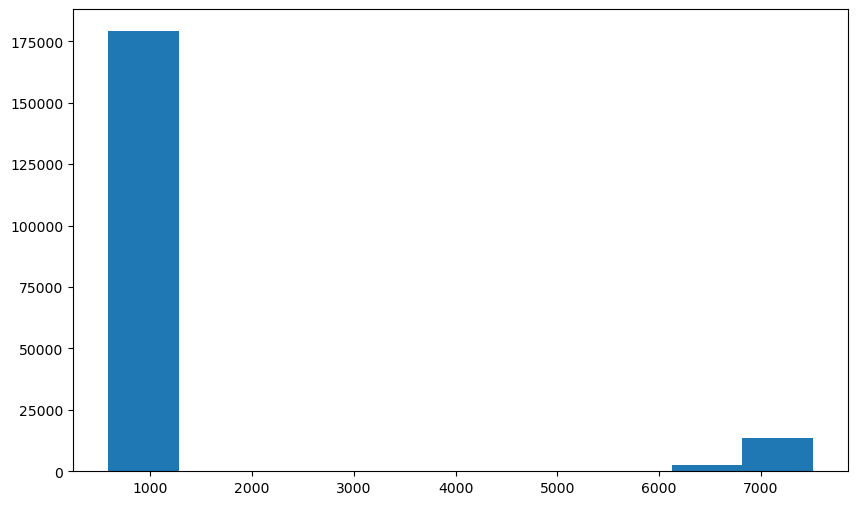

In [43]:
plt.figure(figsize= (10,6))
plt.hist(df['Credit Score'])
plt.show()

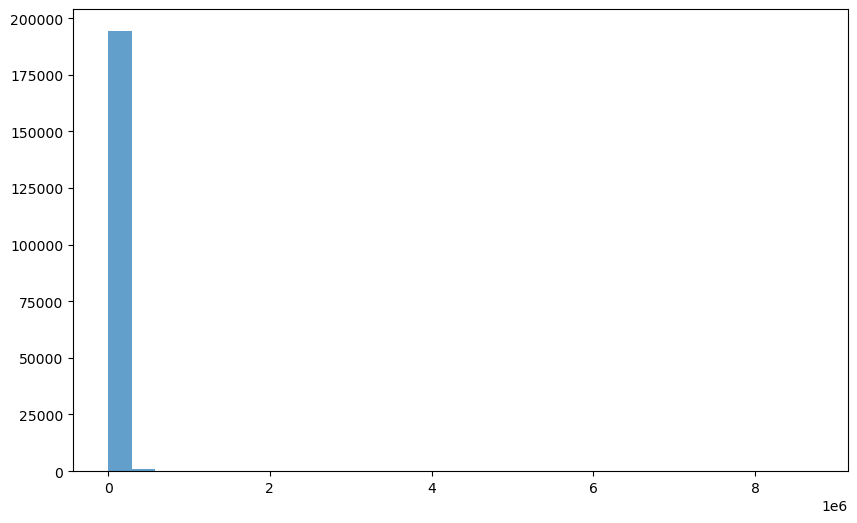

In [44]:
plt.figure(figsize= (10,6))
plt.hist(df['Annual Income'], bins=30, alpha=0.7)
plt.show()

In [45]:
#bu grafiklere göre iki değeri de modla doldurmamızda bir sıkıntı yoktur

In [46]:
mode_value = df['Annual Income'].mode().iloc[0] 

In [47]:
mode_value = df['Credit Score'].mode().iloc[0] 

In [48]:
df['Annual Income'].fillna(mode_value, inplace=True)

In [49]:
df['Credit Score'].fillna(mode_value, inplace=True)

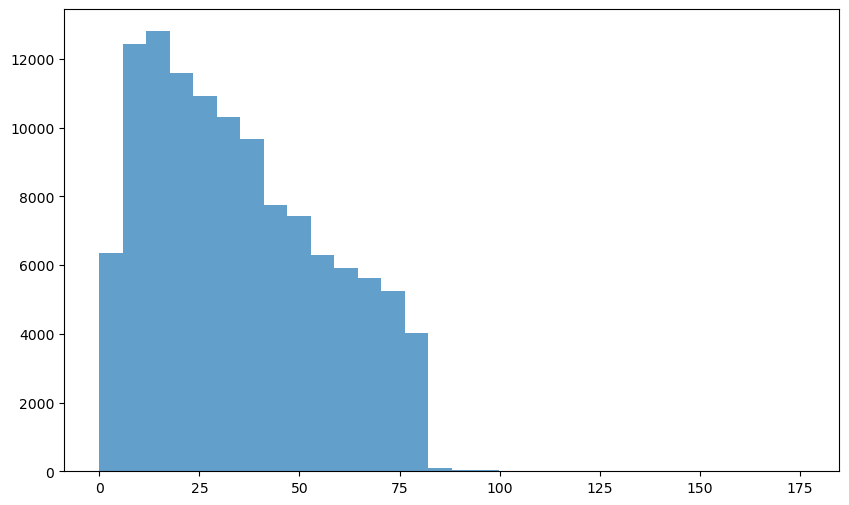

In [50]:
plt.figure(figsize= (10,6))
plt.hist(df['Months since last delinquent'], bins=30, alpha=0.7)
plt.show()

In [51]:
#yüzde 50 den fazla boş değer var ondan dolayı veriyi çıkarmak zorundayız.

In [52]:
df.drop('Months since last delinquent', axis=1, inplace=True)

In [53]:
df.corr(numeric_only = True)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_other
Loan Status,1.000000,0.269804,0.183811,-0.379797,0.053498,0.035548,-0.020787,-0.010179,0.008838,0.001107,-0.012590,0.005408,0.066485,-0.008300,-0.062959,-0.042519,0.003706,0.024949,-0.001793,0.000505,0.022265,-0.005133,0.014854,-0.000259,-0.018092
Current Loan Amount,0.269804,1.000000,0.048366,-0.103797,0.134316,0.014725,-0.003094,-0.000062,0.003138,0.003577,-0.003067,0.002233,0.022415,-0.005950,-0.019448,-0.013373,0.001675,0.007060,-0.000173,0.002249,0.005638,-0.002055,0.005424,-0.001048,-0.005161
Term,0.183811,0.048366,1.000000,-0.054367,-0.047728,-0.035773,-0.080506,0.019326,-0.090077,0.021134,0.002826,0.020307,-0.101154,0.010846,0.094092,-0.003954,-0.003370,0.011237,-0.035947,0.013622,-0.013564,0.017970,0.030435,0.031253,0.029255
Credit Score,-0.379797,-0.103797,-0.054367,1.000000,0.042448,-0.010064,0.006794,0.001075,-0.003069,-0.002549,0.004062,-0.002254,-0.023732,0.002291,0.022892,0.014652,-0.000247,-0.008962,0.002848,-0.001090,-0.007292,0.002289,-0.006628,-0.001805,0.003525
Annual Income,0.053498,0.134316,-0.047728,0.042448,1.000000,0.110140,0.104470,-0.008825,0.208906,-0.032311,0.029782,0.000932,0.128394,-0.026766,-0.114485,0.020090,0.005282,-0.010158,-0.024385,-0.009132,0.055885,-0.003539,-0.002898,-0.008235,-0.014405
Years of Credit History,0.035548,0.014725,-0.035773,-0.010064,0.110140,1.000000,0.128033,0.061251,0.201001,0.061737,0.020911,0.007003,0.176821,0.032031,-0.197944,-0.001981,-0.009164,-0.007641,0.009894,0.003037,0.034114,0.002957,-0.033322,-0.011536,-0.014512
Number of Open Accounts,-0.020787,-0.003094,-0.080506,0.006794,0.104470,0.128033,1.000000,-0.013731,0.222763,-0.022565,0.005754,-0.003226,0.135632,-0.009351,-0.131451,-0.037158,-0.015354,-0.039338,0.107607,-0.014989,-0.018276,-0.017824,-0.059107,-0.018508,-0.059669
Number of Credit Problems,-0.010179,-0.000062,0.019326,0.001075,-0.008825,0.061251,-0.013731,1.000000,-0.103814,0.755787,0.584912,0.004311,-0.001143,0.006744,-0.003146,-0.000820,-0.000180,-0.007838,-0.003844,-0.007293,0.023186,0.000867,-0.017318,-0.000315,0.002627
Current Credit Balance,0.008838,0.003138,-0.090077,-0.003069,0.208906,0.201001,0.222763,-0.103814,1.000000,-0.117839,-0.011119,-0.003769,0.156387,-0.000808,-0.157313,-0.010134,-0.016330,-0.030486,0.077174,-0.010286,-0.012794,-0.013754,-0.050726,-0.019384,-0.040505
Bankruptcies,0.001107,0.003577,0.021134,-0.002549,-0.032311,0.061737,-0.022565,0.755787,-0.117839,1.000000,0.046229,0.003634,-0.003303,0.003757,0.000826,-0.011288,-0.000668,-0.007708,0.005458,-0.007333,0.022296,0.000250,-0.020653,0.000619,-0.003933


In [54]:
abs(df.corr(numeric_only=True)['Loan Status']).sort_values(ascending=False)

Loan Status                     1.000000
Credit Score                    0.379797
Current Loan Amount             0.269804
Term                            0.183811
Home Ownership_Home Mortgage    0.066485
Home Ownership_Rent             0.062959
Annual Income                   0.053498
Purpose_Business Loan           0.042519
Years of Credit History         0.035548
Purpose_Buy a Car               0.024949
Purpose_Home Improvements       0.022265
Number of Open Accounts         0.020787
Purpose_other                   0.018092
Purpose_Other                   0.014854
Tax Liens                       0.012590
Number of Credit Problems       0.010179
Current Credit Balance          0.008838
Home Ownership_Own Home         0.008300
Home Ownership_HaveMortgage     0.005408
Purpose_Medical Bills           0.005133
Purpose_Buy House               0.003706
Purpose_Debt Consolidation      0.001793
Bankruptcies                    0.001107
Purpose_Educational Expenses    0.000505
Purpose_Take a T

### Modelleme

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [56]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_other
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,1,741.0,10,33694.0,584.03,12.3,10,0,6760,16056,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,1,3441,1,734.0,4,42269.0,1106.04,26.3,17,0,6262,19149,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,1,21029,1,747.0,10,90126.0,1321.85,28.8,5,0,20967,28335,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,18743,1,747.0,10,38072.0,751.92,26.2,9,0,22529,43915,0.0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,1,11731,1,746.0,4,50025.0,355.18,11.5,12,0,17391,37081,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [57]:
X = df.drop(['Loan Status', 'Customer ID', 'Loan ID', 'Maximum Open Credit'], axis=1)
y = df['Loan Status']
# Eğitimde gereksiz gördüğümüz string değerleri Customer ID ve Loan ID'yi çıkarıyoruz

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
#model = RandomForestClassifier(n_estimators=100, random_state=42)
#model.fit(X_train, y_train)

In [60]:
#Bir hata aldık Monthly Debt sütununda , değeri de string olarak gördü ve şimdi o değeri de çıkaracağız.

In [61]:
df['Monthly Debt'] = df['Monthly Debt'].replace({'\,': ''}, regex = True)

In [62]:
# Bir yerde #VALUE! böyle bir değer olduğu için hata düzelmedi tekrardan sütunlara bakıp hangilerinde kategorik değer varsa onu tekrardan çıkaracağız.

### Kategorik değer kontrol

In [63]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_other
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,1,11520,1,741.0,10,33694.0,584.03,12.3,10,0,6760,16056,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,1,3441,1,734.0,4,42269.0,1106.04,26.3,17,0,6262,19149,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,1,21029,1,747.0,10,90126.0,1321.85,28.8,5,0,20967,28335,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,1,18743,1,747.0,10,38072.0,751.92,26.2,9,0,22529,43915,0.0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,1,11731,1,746.0,4,50025.0,355.18,11.5,12,0,17391,37081,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  int64  
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  int64  
 5   Credit Score                  256984 non-null  float64
 6   Years in current job          256984 non-null  object 
 7   Annual Income                 256984 non-null  float64
 8   Monthly Debt                  256984 non-null  object 
 9   Years of Credit History       256984 non-null  float64
 10  Number of Open Accounts       256984 non-null  int64  
 11  Number of Credit Problems     256984 non-null  int64  
 12  Current Credit Balance        256984 non-nul

In [65]:
df['Tax Liens'].unique()

array([ 0.,  5.,  1.,  2.,  4.,  3.,  6.,  7.,  9.,  8., 10., 11.])

In [66]:
df['Monthly Debt'] = df['Monthly Debt'].replace({'\''',': ''}, regex = True)

In [67]:
df['Tax Liens'].unique()

array([ 0.,  5.,  1.,  2.,  4.,  3.,  6.,  7.,  9.,  8., 10., 11.])

In [68]:
def find_non_numeric_values(column):
    non_numeric = pd.to_numeric(column, errors='coerce').isna()  # Sayısal olmayanlar için NaN döndürür
    return column[non_numeric]

non_numeric_values = find_non_numeric_values(df['Monthly Debt'])
non_numeric_values

Series([], Name: Monthly Debt, dtype: object)

In [69]:
#Monthly Debt sutununda kategorik değer olmadığını gördük ve type'ını floata dönüştürdük.
df['Monthly Debt'] = pd.to_numeric(df['Monthly Debt'], errors='coerce')

In [70]:
def find_non_numeric_values(column):
    non_numeric = pd.to_numeric(column, errors='coerce').isna()  # Sayısal olmayanlar için NaN döndürür
    return column[non_numeric]

non_numeric_values = find_non_numeric_values(df['Tax Liens'])
non_numeric_values

Series([], Name: Tax Liens, dtype: float64)

In [71]:
df['Tax Liens'] = pd.to_numeric(df['Tax Liens'], errors='coerce')
#Aynı işlemi bu sütun için de yaptık

In [72]:
def find_non_numeric_values(column):
    non_numeric = pd.to_numeric(column, errors='coerce').isna()  # Sayısal olmayanlar için NaN döndürür
    return column[non_numeric]

non_numeric_values = find_non_numeric_values(df['Years in current job'])
non_numeric_values

Series([], Name: Years in current job, dtype: object)

In [73]:
df['Years in current job'] = pd.to_numeric(df['Years in current job'], errors='coerce')
#Aynı işlemi bu sütun için de yaptık

In [74]:
df['Years in current job'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 256984 entries, 0 to 256983
Series name: Years in current job
Non-Null Count   Dtype
--------------   -----
256984 non-null  int64
dtypes: int64(1)
memory usage: 2.0 MB


In [75]:
def find_non_numeric_values(column):
    non_numeric = pd.to_numeric(column, errors='coerce').isna()  # Sayısal olmayanlar için NaN döndürür
    return column[non_numeric]

non_numeric_values = find_non_numeric_values(df['Maximum Open Credit'])
non_numeric_values

184662    #VALUE!
184663    #VALUE!
187512    #VALUE!
187513    #VALUE!
Name: Maximum Open Credit, dtype: object

In [76]:
df['Maximum Open Credit'] = df['Maximum Open Credit'].replace({'#VALUE!': '' , ',': ''}, regex = True)

In [77]:
df['Maximum Open Credit'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 256984 entries, 0 to 256983
Series name: Maximum Open Credit
Non-Null Count   Dtype 
--------------   ----- 
256984 non-null  object
dtypes: object(1)
memory usage: 2.0+ MB


In [78]:
def find_non_numeric_values(column):
    non_numeric = pd.to_numeric(column, errors='coerce').isna()  # Sayısal olmayanlar için NaN döndürür
    return column[non_numeric]

non_numeric_values = find_non_numeric_values(df['Maximum Open Credit'])
non_numeric_values

184662    
184663    
187512    
187513    
Name: Maximum Open Credit, dtype: object

In [79]:
df['Maximum Open Credit'] = df['Maximum Open Credit'].replace('', 0, regex=True)
df['Maximum Open Credit'] = pd.to_numeric(df['Maximum Open Credit'], errors='coerce')
df['Maximum Open Credit'].fillna(0, inplace=True)

In [80]:
# Hatalı değerlerin neye benzediğini kontrol etmek
df['Maximum Open Credit'][df['Maximum Open Credit'].apply(lambda x: isinstance(x, str) and not x.strip())]

Series([], Name: Maximum Open Credit, dtype: int64)

In [81]:
# Bu sütunu (Maximum Open Credit) int64 gözükmesine rağmen bize bir kaç hata çıkardığı için ve her yolu deneyip düzeltemediğim için data frame'den drop ettim.

<class 'pandas.core.series.Series'>
RangeIndex: 256984 entries, 0 to 256983
Series name: Maximum Open Credit
Non-Null Count   Dtype
--------------   -----
256984 non-null  int64
dtypes: int64(1)
memory usage: 2.0 MB


### Tekrardan model kurma

In [84]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [88]:
from sklearn.metrics import classification_report

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.61      0.70     16161
           1       0.84      0.94      0.89     35236

    accuracy                           0.84     51397
   macro avg       0.84      0.77      0.80     51397
weighted avg       0.84      0.84      0.83     51397

